# GEDA - Inspecciones Chicago

## Carlos Bautista

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_path = "/Users/cbautistap/Dropbox/MCD/Cursos/primavera-2021/dpa/Food_Inspections.csv"

In [3]:
data = pd.read_csv(data_path)
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/2021,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,2386523,MC DONALD'S,MC DONALD'S,2560785.0,Restaurant,Risk 2 (Medium),6336 S ASHLAND AVE,CHICAGO,IL,60636.0,08/26/2020,Short Form Complaint,Pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


In [4]:
data.shape

(215130, 17)

In [5]:
data.nunique()

Inspection ID      215130
DBA Name            28753
AKA Name            27360
License #           39111
Facility Type         500
Risk                    4
Address             18525
City                   70
State                   4
Zip                   112
Inspection Date      2797
Inspection Type       110
Results                 7
Violations         156734
Latitude            17248
Longitude           17248
Location            17248
dtype: int64

In [6]:
data.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [7]:
data=data.rename(columns={'License #':'license_number'})
data.head(2)

,Inspection ID,DBA Name,AKA Name,license_number,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/2021,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"


In [8]:
def standarize_column_strings(data, columns, excluded_punctuation=".,*¿?¡!"):
    for col in columns:
        data[col] = data[col].str.lower().str.replace(" ", "_")
        data[col] = data[col].str.lower().str.replace("-", "_")
        data[col] = data[col].str.lower().str.replace("á", "a")
        data[col] = data[col].str.lower().str.replace("é", "e")
        data[col] = data[col].str.lower().str.replace("í", "i")
        data[col] = data[col].str.lower().str.replace("ó", "o")
        data[col] = data[col].str.lower().str.replace("ú", "u")
        data[col] = data[col].str.lower().str.replace("ü", "u")
        for ch in excluded_punctuation:
            data[col] = data[col].str.replace(ch, "")
            
def standarize_column_names(data, excluded_punctuation=".,-*¿?¡!"):
    data.columns = data.columns.str.lower().str.replace(" ", "_")
    for ch in excluded_punctuation:
        data.columns = data.columns.str.replace(ch, "")

In [9]:
cols = data.columns.to_list()
cols

['Inspection ID',
 'DBA Name',
 'AKA Name',
 'license_number',
 'Facility Type',
 'Risk',
 'Address',
 'City',
 'State',
 'Zip',
 'Inspection Date',
 'Inspection Type',
 'Results',
 'Violations',
 'Latitude',
 'Longitude',
 'Location']

In [10]:
col_text = [#'Inspection ID',
 'DBA Name',
 'AKA Name',
 #'license_number',
 'Facility Type',
 'Risk',
 'Address',
 'City',
 'State',
 #'Zip',
 'Inspection Date',
 'Inspection Type',
 'Results',
 'Violations',
 #'Latitude',
 #'Longitude',
 'Location']
standarize_column_strings(data, col_text)
data.head(2)

/Users/cbautistap/.pyenv/versions/itam_dpa/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if sys.path[0] == '':


,Inspection ID,DBA Name,AKA Name,license_number,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,philz_coffee,philz_coffee,2766979.0,NaN,risk_2_(medium),1555_n_wells_st_,chicago,il,60610.0,01/07/2021,license,not_ready,NaN,41.910736,-87.634551,(_8763455069145124_41910736031820235)
1,2453551,bian,bian,2744753.0,restaurant,risk_1_(high),600_w_chicago_ave_,chicago,il,60654.0,10/20/2020,license,pass,NaN,41.896585,-87.642996,(_8764299618172501_41896585191199556)


In [11]:
standarize_column_names(data)
data.head(2)

/Users/cbautistap/.pyenv/versions/itam_dpa/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,inspection_id,dba_name,aka_name,license_number,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,2472391,philz_coffee,philz_coffee,2766979.0,NaN,risk_2_(medium),1555_n_wells_st_,chicago,il,60610.0,01/07/2021,license,not_ready,NaN,41.910736,-87.634551,(_8763455069145124_41910736031820235)
1,2453551,bian,bian,2744753.0,restaurant,risk_1_(high),600_w_chicago_ave_,chicago,il,60654.0,10/20/2020,license,pass,NaN,41.896585,-87.642996,(_8764299618172501_41896585191199556)


### Queremos ver el número de inspecciones según el resultado que se obtuvo

In [12]:
tbl_results=pd.DataFrame(data['results'].value_counts()).rename_axis('description').reset_index()
tbl_results

,description,results
0,pass,112641
1,fail,41527
2,pass_w/_conditions,32550
3,out_of_business,18709
4,no_entry,7341
5,not_ready,2290
6,business_not_located,72


Text(0.5, 1.0, 'Resultado de las evaluaciones a establecimientos')

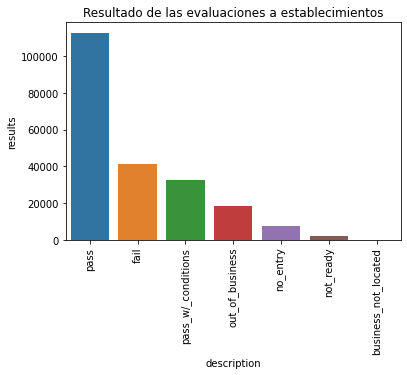

In [13]:
g_results = sns.barplot(y = 'results', x = 'description', data = tbl_results, ci = None)
for item in g_results.get_xticklabels():
    item.set_rotation(90)
g_results.set_title("Resultado de las evaluaciones a establecimientos")

Se crea variable de mes para hacer análisis por mes

In [15]:
m_ini = 0
m_end = 2
data['month']=data['inspection_date'].map(lambda x: str(x)[m_ini:m_end]).astype('int')

Tabla resumen de mes de inspección y el resultado que se obtuvo

In [19]:
data.groupby(['month','results']).size().unstack()

results,business_not_located,fail,no_entry,not_ready,out_of_business,pass,pass_w/_conditions
month,,,,,,,
1,7.0,3358.0,490.0,145.0,1194.0,9355.0,2571.0
2,4.0,3115.0,389.0,149.0,1059.0,8460.0,2345.0
3,2.0,3639.0,557.0,203.0,1192.0,10354.0,2770.0
4,NaN,3545.0,492.0,185.0,1284.0,9726.0,2656.0
5,8.0,3795.0,518.0,211.0,1572.0,10709.0,2834.0
6,1.0,3831.0,643.0,180.0,1373.0,10365.0,2883.0
7,5.0,3247.0,598.0,183.0,1313.0,7844.0,2842.0
8,6.0,3866.0,808.0,219.0,1665.0,9228.0,3202.0
9,10.0,3851.0,838.0,212.0,2051.0,9809.0,2904.0


Hacemos subset de los establecimientos que no pasaron la inpsección:

In [21]:
data_fail = data[data['results']=='fail']
data_fail.shape

(41527, 18)

### De las inspecciones que no pasaron, ¿que porcentaje representa cada categoría de riesgo?

In [22]:
tbl_fail_risk = pd.DataFrame(data_fail['risk'].value_counts()).rename_axis('description').reset_index()
tbl_fail_risk['perc'] = ((tbl_fail_risk['risk']/tbl_fail_risk['risk'].sum())*100).round(2)
tbl_fail_risk

,description,risk,perc
0,risk_1_(high),29287,70.56
1,risk_2_(medium),8083,19.47
2,risk_3_(low),4130,9.95
3,all,5,0.01


Text(0.5, 1.0, 'Porcentaje de establecimientos que no pasaron la inspección según tipo de riesgo')

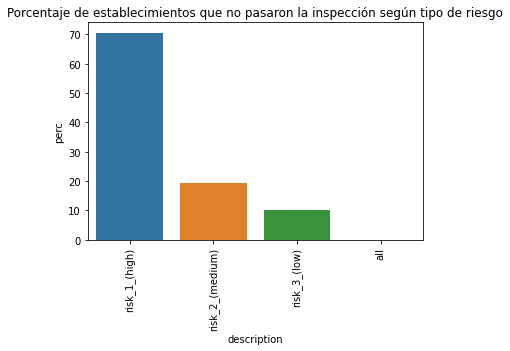

In [24]:
g_fr = sns.barplot(y = 'perc', x = 'description', data = tbl_fail_risk, ci = None)
for item in g_fr.get_xticklabels():
    item.set_rotation(90)
g_fr.set_title("Porcentaje de establecimientos que no pasaron la inspección según tipo de riesgo")

### Ahora nos interesa conocer cómo se comportan las inspecciones no pasadas durante los meses del año.

En particular, buscamos conocer la proporción de establecimientos que no pasaron la inspección del total de inspecciones realizadas cada mes

In [25]:
tbl_fail_m2 = pd.DataFrame(data_fail['month'].value_counts()).rename_axis('description').reset_index().rename(columns={'month':'fail_obs'})
tbl_mes = pd.DataFrame(data['month'].value_counts()).rename_axis('description').reset_index().rename(columns={'month':'total_obs'})
tbl_ft = pd.merge(tbl_fail_m2,tbl_mes, on='description')
tbl_ft['pct_fail'] = (tbl_ft['fail_obs']/tbl_ft['total_obs']*100).round(2)
                      
tbl_ft

,description,fail_obs,total_obs,pct_fail
0,8,3866,18994,20.35
1,9,3851,19675,19.57
2,6,3831,19276,19.87
3,5,3795,19647,19.32
4,10,3775,19775,19.09
5,3,3639,18717,19.44
6,4,3545,17888,19.82
7,1,3358,17120,19.61
8,7,3247,16032,20.25
9,2,3115,15521,20.07


Text(0.5, 1.0, 'Porcentaje de establecimientos que no pasaron la inspección, según mes')

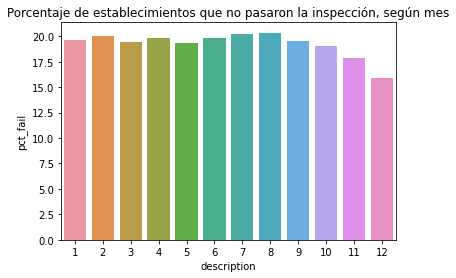

In [28]:
g_ft = sns.barplot(y = 'pct_fail', x = 'description', data = tbl_ft, ci = None,
                  order = [1,2,3,4,5,6,7,8,9,10,11,12])
g_ft.set_title("Porcentaje de establecimientos que no pasaron la inspección, según mes")

In [ ]:
tbl_fail_m = pd.DataFrame(data_fail['month'].value_counts()).rename_axis('description').reset_index().rename(columns={'month':'fail_obs'})
tbl_fail_m['perc'] = ((tbl_fail_m['fail_obs']/tbl_fail_m['fail_obs'].sum())*100).round(2)
tbl_fail_m

### Nos interesa ver la distribución geoespacial de los establecimientos que no pasaron la inspección

Creamos variable de label donde el valor de 1 representa a quien no pasó la inspección y 0 en otro caso

In [30]:
data['label'] = data['results'].apply(lambda x: '1' if x in ['fail'] else '0' )

In [ ]:
data.groupby('label').count()

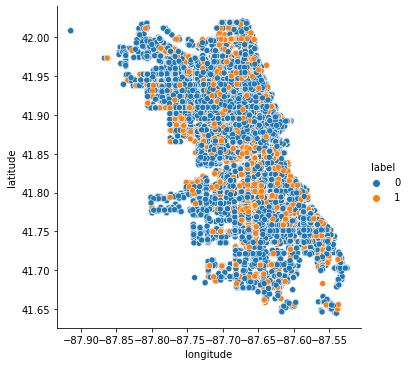

In [31]:
g_map = sns.relplot(x="longitude", y="latitude", data=data, hue='label')
g_map.set(xlabel="longitude", ylabel="latitude");

In [33]:
data.groupby('inspection_date').count()

,inspection_id,dba_name,aka_name,license_number,facility_type,risk,address,city,state,zip,inspection_type,results,violations,latitude,longitude,location,month,label
inspection_date,,,,,,,,,,,,,,,,,,
01/02/2013,23,23,23,23,20,23,23,23,23,23,23,23,16,23,23,23,23,23
01/02/2014,21,21,21,21,21,21,21,21,21,21,21,21,16,21,21,21,21,21
01/02/2015,19,19,19,19,19,19,19,19,19,19,19,19,17,19,19,19,19,19
01/02/2018,15,15,15,15,15,15,15,15,15,15,15,15,11,15,15,15,15,15
01/02/2019,14,14,14,14,14,14,14,14,14,14,14,14,8,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2014,19,19,18,19,17,19,19,19,19,19,19,19,14,19,19,19,19,19
12/31/2015,26,26,26,26,26,26,26,26,26,26,26,26,19,26,26,26,26,26
12/31/2018,22,22,22,22,21,22,22,22,22,22,22,22,14,22,22,22,22,22


In [34]:
data.groupby('risk').count()

,inspection_id,dba_name,aka_name,license_number,facility_type,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,month,label
risk,,,,,,,,,,,,,,,,,,
all,29,29,19,29,10,29,29,29,29,29,29,29,0,29,29,29,29,29
risk_1_(high),153869,153869,152865,153864,152921,153869,153799,153841,153850,153869,153868,153869,118691,153434,153434,153434,153869,153869
risk_2_(medium),41978,41978,41296,41966,41532,41978,41935,41971,41955,41978,41978,41978,29758,41839,41839,41839,41978,41978
risk_3_(low),19185,19185,18424,19185,15760,19185,19143,19170,19175,19185,19185,19185,9232,19051,19051,19051,19185,19185


In [35]:
data.groupby('results').count()

,inspection_id,dba_name,aka_name,license_number,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,violations,latitude,longitude,location,month,label
results,,,,,,,,,,,,,,,,,,
business_not_located,72,72,57,72,45,64,72,70,72,70,72,72,0,69,69,69,72,72
fail,41527,41527,40867,41524,41159,41505,41527,41492,41518,41518,41527,41527,38344,41382,41382,41382,41527,41527
no_entry,7341,7341,7250,7341,7270,7334,7341,7335,7338,7340,7341,7341,545,7338,7338,7338,7341,7341
not_ready,2290,2290,2235,2290,2187,2274,2290,2276,2286,2287,2290,2290,64,2282,2282,2282,2290,2290
out_of_business,18709,18709,18129,18708,14669,18705,18709,18690,18706,18695,18709,18709,32,18673,18673,18673,18709,18709
pass,112641,112641,111700,112629,112396,112629,112641,112572,112622,112623,112641,112640,86716,112209,112209,112209,112641,112641
pass_w/_conditions,32550,32550,32405,32549,32512,32550,32550,32537,32538,32545,32550,32550,31982,32467,32467,32467,32550,32550


In [37]:
data.groupby('risk').count()

,inspection_id,dba_name,aka_name,license_number,facility_type,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,month,label
risk,,,,,,,,,,,,,,,,,,
all,29,29,19,29,10,29,29,29,29,29,29,29,0,29,29,29,29,29
risk_1_(high),153869,153869,152865,153864,152921,153869,153799,153841,153850,153869,153868,153869,118691,153434,153434,153434,153869,153869
risk_2_(medium),41978,41978,41296,41966,41532,41978,41935,41971,41955,41978,41978,41978,29758,41839,41839,41839,41978,41978
risk_3_(low),19185,19185,18424,19185,15760,19185,19143,19170,19175,19185,19185,19185,9232,19051,19051,19051,19185,19185


In [38]:
data_fail.groupby('risk').count()

,inspection_id,dba_name,aka_name,license_number,facility_type,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,month
risk,,,,,,,,,,,,,,,,,
all,5,5,2,5,1,5,5,5,5,5,5,5,0,5,5,5,5
risk_1_(high),29287,29287,29055,29284,29113,29287,29273,29284,29284,29287,29287,29287,27439,29200,29200,29200,29287
risk_2_(medium),8083,8083,7906,8083,8005,8083,8075,8081,8078,8083,8083,8083,7466,8059,8059,8059,8083
risk_3_(low),4130,4130,3889,4130,4032,4130,4117,4126,4129,4130,4130,4130,3438,4096,4096,4096,4130


In [39]:
data_fail.groupby('state').count()

,inspection_id,dba_name,aka_name,license_number,facility_type,risk,address,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,month
state,,,,,,,,,,,,,,,,,
il,41517,41517,40857,41514,41149,41495,41517,41485,41508,41517,41517,41517,38334,41373,41373,41373,41517
in,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1


In [40]:
data_fail.groupby('inspection_type').count()

,inspection_id,dba_name,aka_name,license_number,facility_type,risk,address,city,state,zip,inspection_date,results,violations,latitude,longitude,location,month
inspection_type,,,,,,,,,,,,,,,,,
1315_license_reinspection,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
business_not_located,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
canvass,19666,19666,19592,19665,19534,19666,19666,19663,19663,19665,19666,19666,19204,19592,19592,19592,19666
canvass_re_inspection,1636,1636,1632,1635,1635,1636,1636,1635,1636,1636,1636,1636,1620,1625,1625,1625,1636
complaint,6478,6478,6440,6478,6462,6474,6478,6474,6478,6478,6478,6478,6350,6473,6473,6473,6478
complaint_fire,59,59,59,59,57,59,59,59,59,59,59,59,37,59,59,59,59
complaint_fire_re_inspection,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
complaint_re_inspection,806,806,801,806,806,806,806,806,806,806,806,806,800,803,803,803,806
consultation,113,113,107,113,109,111,113,113,113,113,113,113,68,113,113,113,113
